In [1]:
import seaborn as sns

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
earthquakes = pd.read_csv('earthquakes_parsed_place.csv')

### Utilizing seaborn for advanced plotting

#### Categorical data

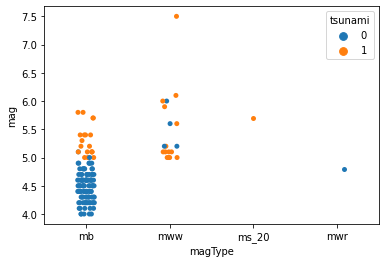

In [2]:
# stripplot() function which plots the points in strips that denote each category

# Passing subset of earthquakes occurring in Indonesia to the data parameter, and specifying that we want to put magType on the x-axis, magnitudes on y-axis, 
# and color the points by whether the earthquakes was accompanied by a tsunami (blue)

sns.stripplot(x='magType', y='mag', hue='tsunami', data=earthquakes.query('parsed_place == "Indonesia"'))
plt.show()

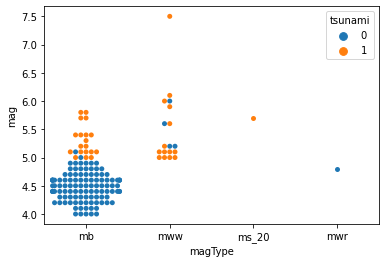

In [3]:
# swarmplot() function will reduce the overlap as much as possible

sns.swarmplot(x='magType', y='mag', hue='tsunami', data=earthquakes.query('parsed_place == "Indonesia"'))
plt.show()

#### Correlations and heatmaps

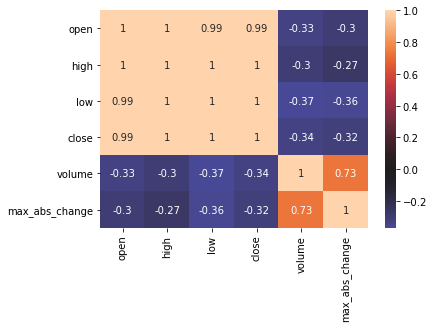

In [4]:
# Making a heatmap of the correlations between the OHLC stock prices, the log of volume traded, and the daily difference between the highest and lowest prices (max_abs_change)

sns.heatmap(fb.sort_index().assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).corr(), annot=True, center=0)

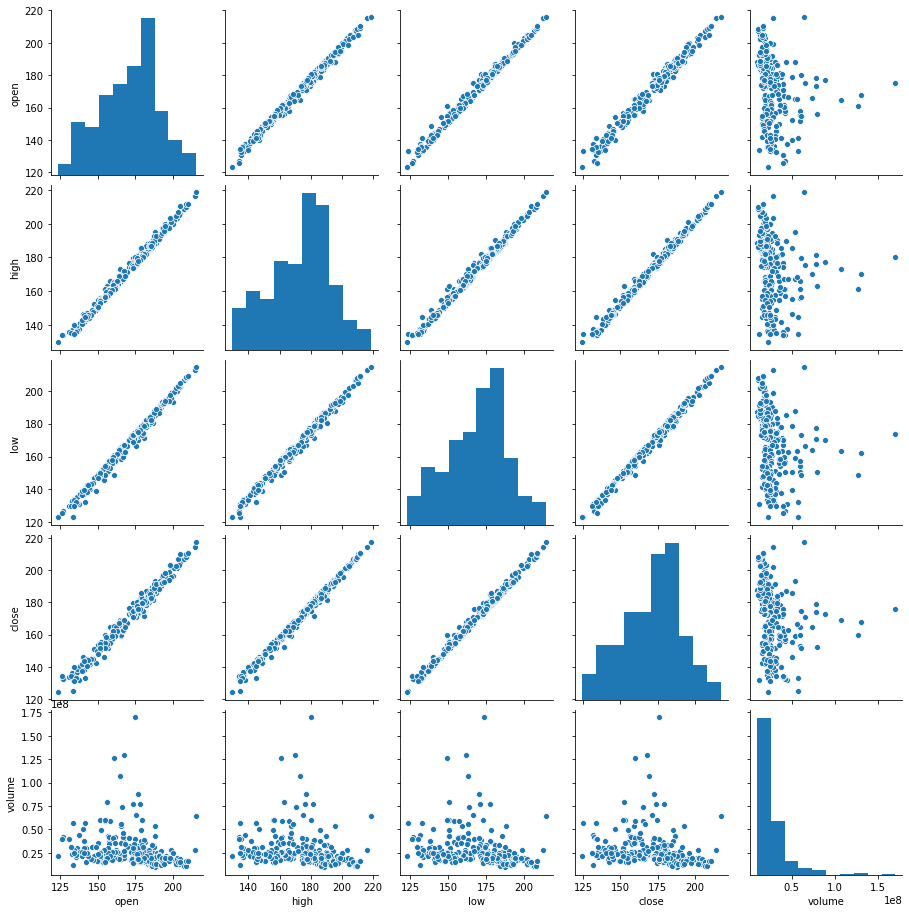

In [5]:
# Using pairplot() to see the correlations between the columns

sns.pairplot(fb)

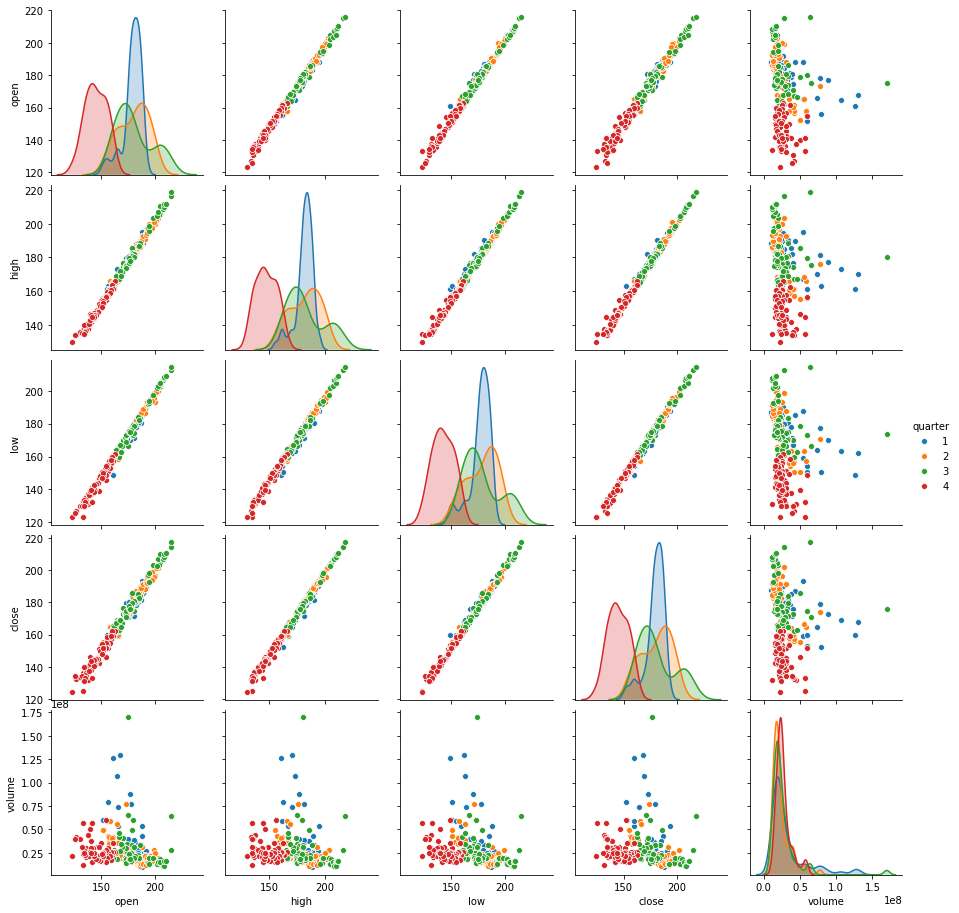

In [6]:
# How distribution of the data changed each quarter of the year, also coloring based on other data 

sns.pairplot(fb.assign(quarter=lambda x: x.index.quarter), diag_kind='kde', hue='quarter')

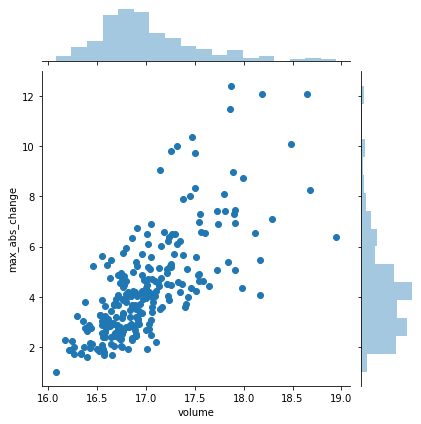

In [7]:
# Comparing two variables by using jointplot() 

sns.jointplot(x='volume', y='max_abs_change', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

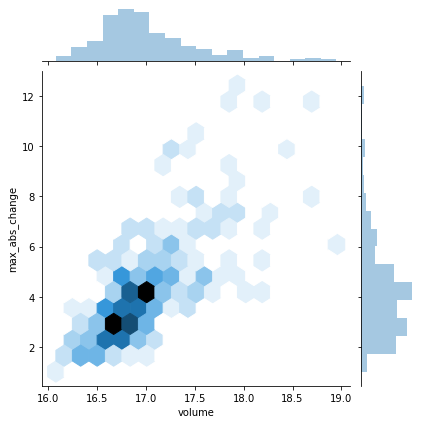

In [8]:
# Using hexbins in jointplot()

sns.jointplot(x='volume', y='max_abs_change', kind='hex', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high -fb.low))

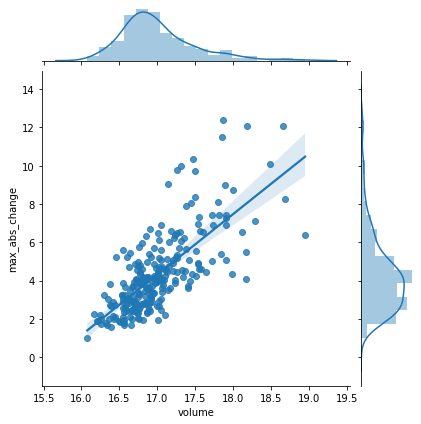

In [9]:
# Plotting a regression in the center and get kernel density estimates 

sns.jointplot(x='volume', y='max_abs_change', kind='reg', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

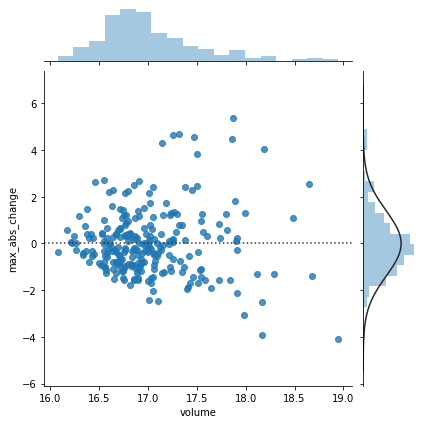

In [10]:
# Checking residuals
# Residuals are the observed values minus the values predicted using the regression line

sns.jointplot(x='volume', y='max_abs_change', kind='resid', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

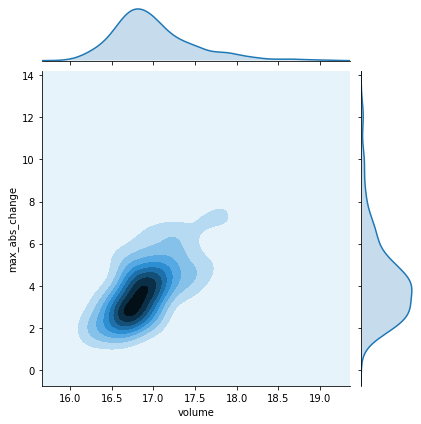

In [11]:
# Using kde to get a plot representing the joint density estimate

sns.jointplot(x='volume', y='max_abs_change', kind='kde', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

#### Regression plots

In [12]:
# regplot() calculates a regression line and plots it, while residplot() calculates the regression and plot only the residuals

# We can write a function to combine these two

# This function will plot all permutations of any two columns allowing to see each column as the regressor and as the dependent variable

In [13]:
# Using assign() to create new columns and saving them in a new dataframe
fb_reg_data = fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).iloc[:, -2:]

In [14]:
# Importing itertools to create efficient iterators for permutations, combinations and infinite cycles or repeats
import itertools

iterator = itertools.repeat('I am an iterator', 1)

for i in iterator:
  print(f'--->{i}')
print('This printed once because the iterator has been exhausted')

for i in iterator:
  print(f'--->{i}')


--->I am an iterator
This printed once because the iterator has been exhausted


In [15]:
iterable = list(itertools.repeat('I am an iterable', 1))

for i in iterable:
  print(f'--->{i}')
print('This prints again because it is an iterable')

for i in iterable:
  print(f'--->{i}')



--->I am an iterable
This prints again because it is an iterable
--->I am an iterable


In [16]:
# Writing function for regression and residuals permutation plots

def reg_resid_plots(data):
  """Using seaborn, plot the regression and residuals plots
  side-by-side for every permutation of 2 columns in the data
  
  Parameters: 
    - data: A pandas dataframe
  
  Returns:
    - A matplotlib Figure object
  """

  num_cols = data.shape[1]
  permutation_count = num_cols * (num_cols - 1)

  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

  for (x, y), axes, color in zip(
    itertools.permutations(data.columns, 2),
    ax,
    itertools.cycle(['royalblue', 'darkorange'])
  ):
    for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
      func(x=x, y=y, data=data, ax=subplot, color=color)
  plt.close()
  return fig

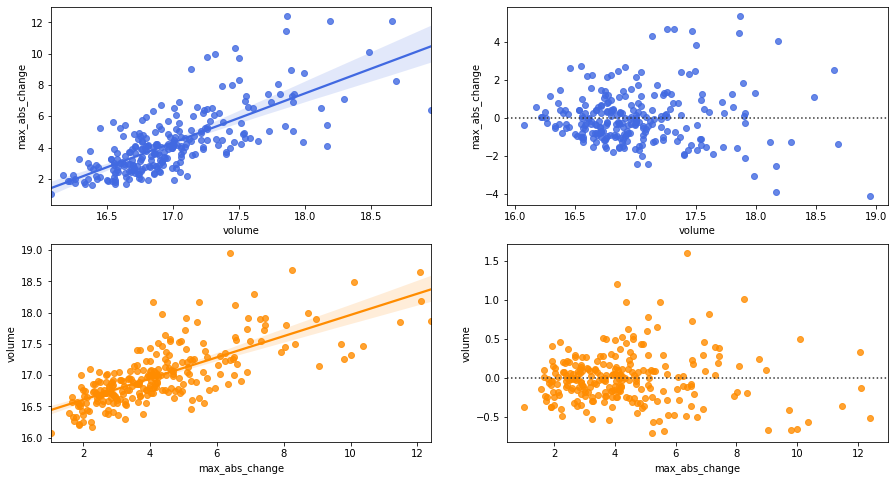

In [17]:
reg_resid_plots(fb_reg_data)

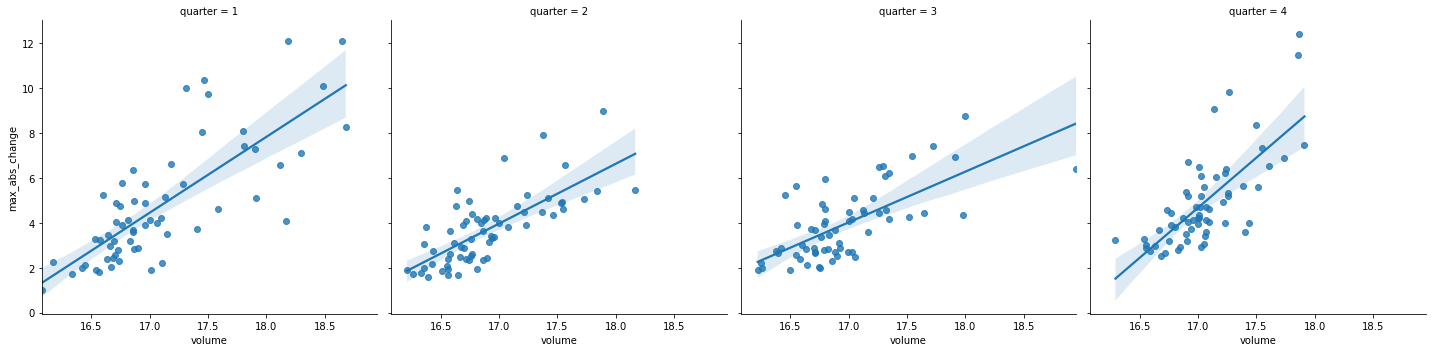

In [18]:
# Plotting regressions across different subsets of our data with lmplot()
# We split regression plots with hue, col, and row, which will color by values in a given column, make a new column for each value, and make a new row for each value, respectively.


# Calculating a regression per quarter with the Facebook stock data, using the volume traded and the daily difference between the highest and lowest price, 
# to see whether this relationship also changes
sns.lmplot(x='volume', y='max_abs_change', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low, quarter=lambda x: x.index.quarter), col='quarter')

#### Distributions

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

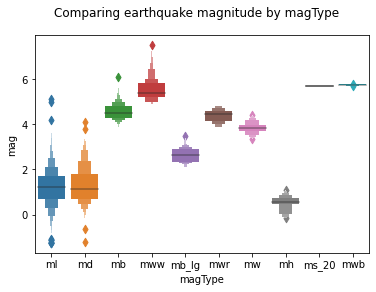

In [20]:
# Using boxenplot() to compare earthquake magnitudes across different values for magType

sns.boxenplot(x='magType', y='mag', data=earthquakes[['magType', 'mag']])
plt.suptitle('Comparing earthquake magnitude by magType')

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

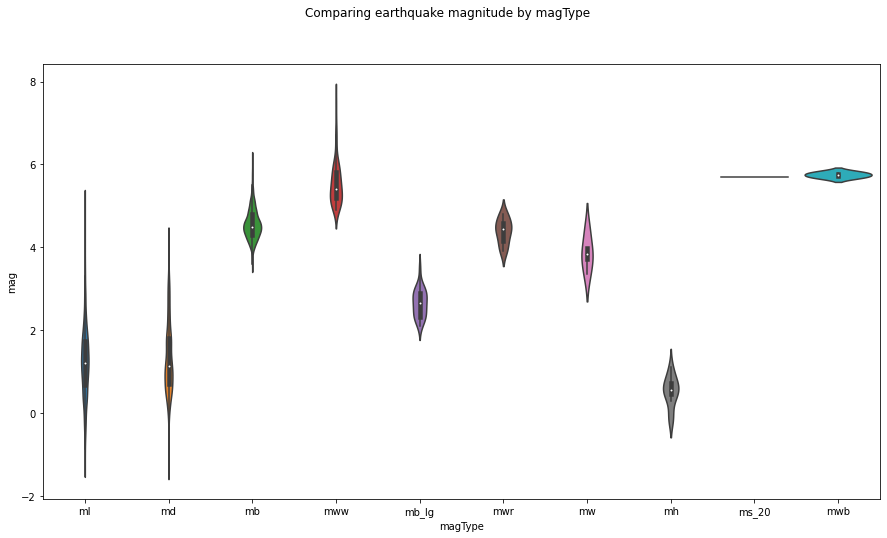

In [25]:
# Using violinplot() which combine kernel density estimates and box plots to visualize quantiles and see the distribution

fig, axes = plt.subplots(figsize=(15, 8))

sns.violinplot(x='magType', y='mag', data=earthquakes[['magType', 'mag']])
plt.suptitle('Comparing earthquake magnitude by magType')

#### Faceting

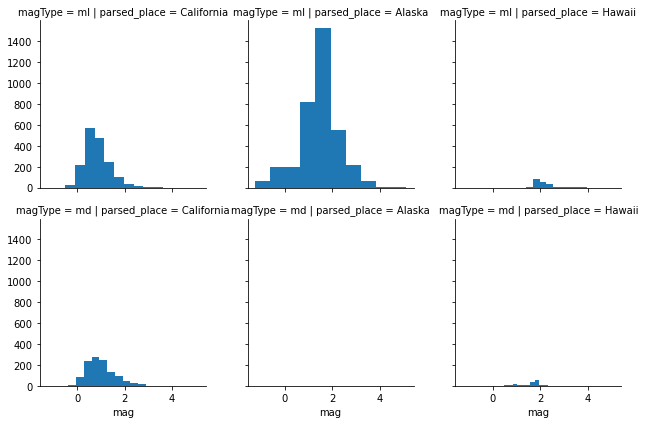

In [27]:
# Faceting allows to plot subsets (facets) of data across subplots

# Creating a facet grid that will allow to compare the distributions of earthquake magnitudes across the magTypes of ml and md in California, Alaska and Hawaii

# First create the FacetGrid object with the data we will be using and define how it will be subset with the row and col arguments

g = sns.FacetGrid(earthquakes[(earthquakes.parsed_place.isin(['California', 'Alaska', 'Hawaii']))\
  & (earthquakes.magType.isin(['ml', 'md']))
  ],
  row='magType', col='parsed_place')

# Using FacetGrid.map() method to run a plotting function on each of the subsets passing along any necessary arguments

g = g.map(plt.hist, 'mag')

### Formatting

#### Titles and labels

Text(0, 0.5, 'price ($)')

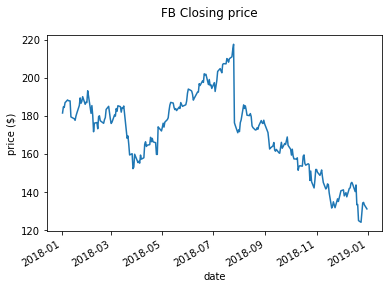

In [28]:
# Plotting Facebook closing price and label everything using matplotlib

fb.close.plot()
plt.suptitle('FB Closing price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price($)')

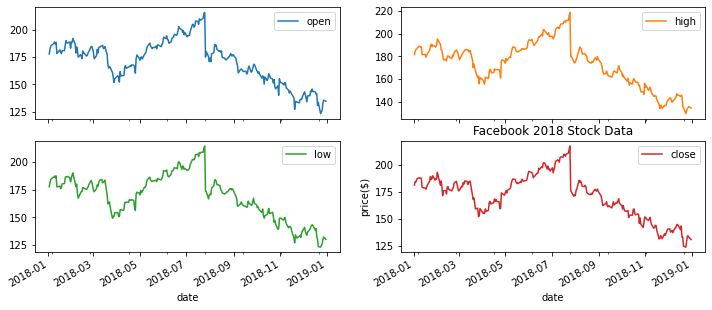

In [29]:
# Making subplots of Facebook OHLC data and using plt.title() 
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price($)')

Text(0, 0.5, 'price($)')

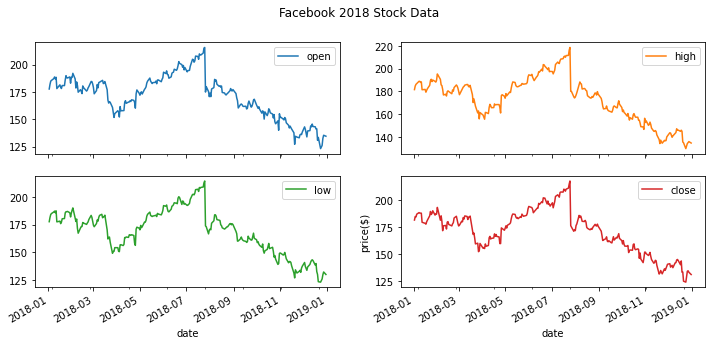

In [30]:
# Same thing but using plt.suptitle() which puts the title for the plot as a whole
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price($)')

#### Legends

Text(0, 0.5, 'price($)')

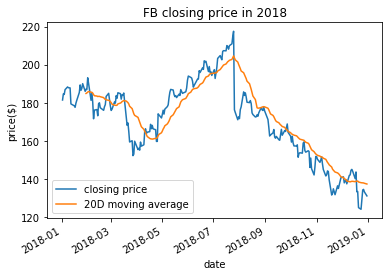

In [31]:
# Plotting Facebook stock's closing price and the 20-day moving average, using the label argument to provide a descriptive name for the legend

fb.assign(ma=lambda x: x.close.rolling(20).mean()).plot(y=['close', 'ma'], title='FB closing price in 2018', label=['closing price', '20D moving average'])
plt.legend(loc='lower left')
plt.ylabel('price($)')

#### Formatting axes

Text(0, 0.5, 'price($)')

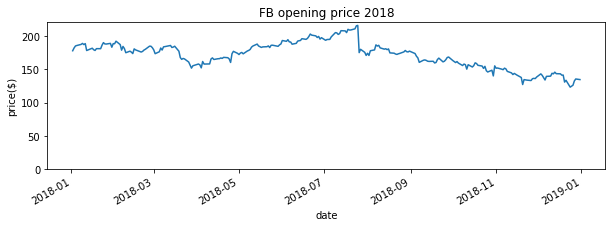

In [32]:
# Plotting Facebook stock's opening price and starting y-axis at zero with ylim()

fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price($)')

Text(0, 0.5, 'price($)')

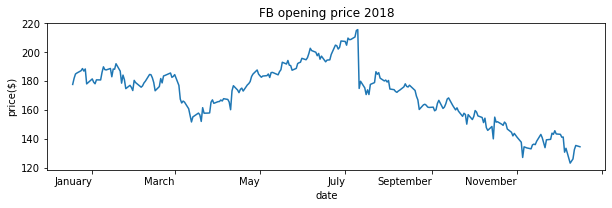

In [33]:
# Controlling tick marks with xticks() and yticks()

# Moving the tick mark of the Facebook open price plot to the 15th of each month and then label each month with its name
# Additionally, show every other month
import calendar

fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15, calendar.month_name[1::2])
plt.ylabel('price($)')

Text(0, 0.5, 'percent of highest price ($218.62)')

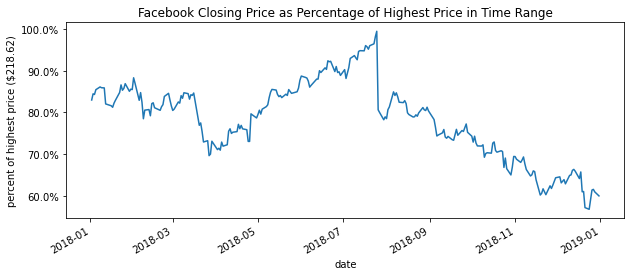

In [35]:
# Formatting percentages or making sure only integers are shown with the ticker module
import matplotlib.ticker as ticker

# Plotting Facebook closing price each day as a percentage of the highest price it had throughout the data
# The shape of the curve will be the same, but the values on the y-axis will need to be represented as percentages

ax = fb.close.plot(figsize=(10, 4), title='Facebook Closing Price as Percentage of Highest Price in Time Range')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=fb.high.max()))
ax.set_yticks([fb.high.max() * pct for pct in np.linspace(0.6, 1, num=5)]) # show only round percentages
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

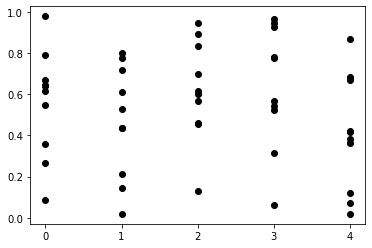

In [36]:
# Using MultipleLocator to hide the ticks at non-integer locations
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(ticker.MultipleLocator(base=1))

### Customizing visualizations

#### Adding reference lines

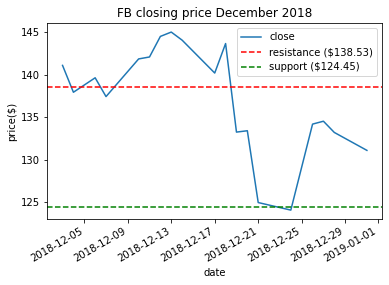

In [38]:
# Adding support and resistance reference lines to line plot of the closing price


support = 124.45
resistance = 138.53

fb.close['2018-12'].plot(title='FB closing price December 2018')
plt.axhline(y=resistance, color='r', linestyle='--', label=f'resistance (${resistance:,.2f})')
plt.axhline(y=support, color='g', linestyle='--', label=f'support (${support:,.2f})')
plt.ylabel('price($)')
plt.legend()


In [39]:
# Using axvline() to draw vertical reference lines for the number of standard deviations from the mean on the distribution of earthquake magnitudes in Indonesia with magType of mb

def std_from_mean_kde(data):
  """
  Plot the KDE of the pandas series along with vertical reference lines for each standard deviation from the mean
  
  Parameters: 
    - data: pandas Series with numeric data
  
  Returns: Matplotlib Axes object
  """

  mean_mag, std_mean = data.mean(), data.std()

  ax = data.plot(kind='kde')
  ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')

  colors = ['green', 'orange', 'red']
  multipliers = [1, 2, 3]
  signs = ['-', '+']

  for sign, (color, multiplier) in itertools.product(
    signs, zip(colors, multipliers)
  ):
    adjustment = multiplier * std_mean
    if sign == '-':
      value = mean_mag - adjustment
      label = '{} {}{}{}'.format(r'$\mu$', r'$\pm$', multiplier, r'$\sigma$')
    else:
      value = mean_mag + adjustment
      label = None
    
    ax.axvline(value, color=color, label=label, alpha=0.5)
  
  ax.legend()
  return ax

Text(0.5, 0, 'mb earthquake magnitude')

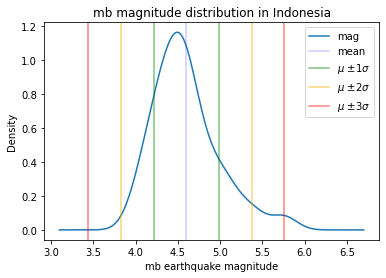

In [40]:
# Using std_from_mean_kde() function to see which parts of the estimated distribution of earthquake magnitudes in Indonesia are within one, two, or three standard deviations from the mean

ax = std_from_mean_kde(earthquakes.query('magType == "mb" and parsed_place == "Indonesia"').mag)
ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

Text(0, 0.5, 'y')

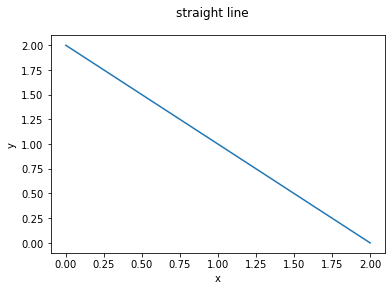

In [41]:
# Making a line with an arbitrary slope as a reference

plt.plot([0, 2], [2, 0])
plt.suptitle('straight line')
plt.xlabel('x')
plt.ylabel('y')

#### Shading regions

Text(0, 0.5, 'Price($)')

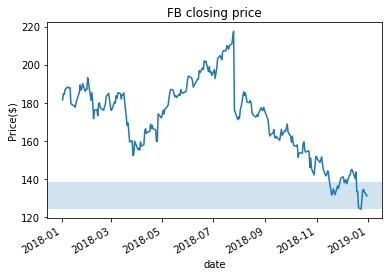

In [42]:
ax = fb.close.plot(title='FB closing price')
ax.axhspan(support, resistance, alpha=0.2)
plt.ylabel('Price($)')

Text(0.5, 0.98, 'FB differential between high and low price Q4 2018')

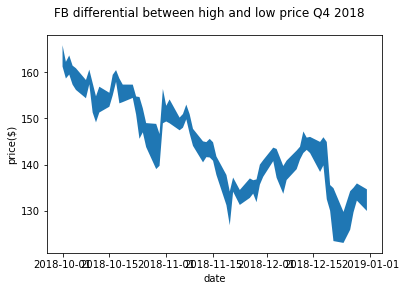

In [45]:
# Shading the area between two curves with fill_between() and fill_betweenx()
fb_q4 = fb['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low)
ticks = ['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01']
plt.xlabel('date')
plt.ylabel('price($)')
plt.suptitle('FB differential between high and low price Q4 2018')